In [1]:
print ("============================================================")
print (" Course Work                              Robiul Islam      ")
print ("============================================================")


import pandas as pd 
from sklearn.utils import shuffle
from itertools import combinations
import bisect
import math
import numpy as np

data = pd.read_csv("datafull.csv",sep=';') 
gen = pd.read_csv('/Users/HSE/coursework/python_vmv/SeqDem/gen.csv')
gender = pd.read_csv('/Users/HSE/coursework/python_vmv/SeqDem/SocialAttributes(gender).csv')


data['Genaration']=gen
data['gender'] = gender
# Remove Null value
#data.dropna(inplace = True)
data.fillna(data.mean(), inplace=True)
data = shuffle(data, random_state=7)
print(data.head(10))
def power_set(List):
    PS = [list(j) for i in range(len(List)) for j in combinations(List, i+1)]
    return PS

def shapley_calc(N,characteristic_function,n):
    shapley_values = []
    for i in range(n):
        shapley = 0
        for j in N:
            if i not in j:
                try:
                    cmod = len(j)
                    Cui = j[:]
                    l = N.index(j)
                    k = N.index(Cui)
                    temp = float(float(characteristic_function[k]) - float(characteristic_function[l])) *\
                               float(math.factorial(cmod) * math.factorial(n - cmod - 1)) / float(math.factorial(n))
                    shapley += temp
                except:
                    temp = float(N[0][0])
                    shapley += temp

        shapley_values.append(shapley)
    return shapley_values 

result =[]
for row in range(data.shape[0]):
    PS = power_set(data.iloc[row])
    Chan_fun =[]
    for i in PS:
        Chan_fun.append(max(i))
    Value = shapley_calc(PS,Chan_fun,5)
    result.append(max(Value))
    
data['shapley_value'] = result

def fitScaler(d):
    v = d.values
    return v / np.sqrt(np.sum(v**2))

data['separation'] = fitScaler(data['separation'])
data['work'] = fitScaler(data['work'])
data['partner'] = fitScaler(data['partner'])
data['marriage'] = fitScaler(data['marriage'])
data['children'] = fitScaler(data['children'])
data['shapley_value'] = fitScaler(data['shapley_value'])

print(data.head(10))

# gen = pd.read_csv('/Users/HSE/coursework/python_vmv/SeqDem/gen.csv')
# print(gen.head())

 Course Work                              Robiul Islam      
           work  separation    partner   marriage   children  Genaration  \
1627  13.000000   21.000000  23.058615  25.000000  36.000000           1   
1678  20.000000   23.000000  23.000000  22.000000  23.000000           1   
631   23.000000   18.000000  23.058615  25.000000  27.000000           2   
1940  17.000000   15.000000  19.000000  20.000000  24.000000           2   
2     19.193059   20.754376  23.058615  22.902162  24.075645           0   
1125  19.000000   20.000000  23.058615  26.000000  26.000000           5   
2138  18.000000   20.000000  23.058615  24.000000  24.000000           4   
737   17.000000   25.000000  23.058615  22.902162  24.075645           3   
832   17.000000   20.000000  20.000000  20.000000  18.000000           4   
204   16.000000   20.754376  16.000000  19.000000  19.000000           6   

      gender  
1627       0  
1678       1  
631        1  
1940       1  
2          0  
1125       0

In [44]:
import xgboost
import shap
from sklearn.model_selection import train_test_split
import random

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X = data[['work','separation','partner','marriage','children','shapley_value','gender']].values.astype(float)
y = data['Genaration'].values



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(1, 100))


model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train[0,:])



#background = x_train[np.random.choice(X_train.shape[0], 100, replace=False)]
#e = shap.DeepExplainer(model, background)
#shap_values = e.shap_values(x_test)

In [41]:
import sklearn
import shap
from sklearn.model_selection import train_test_split
import random

# print the JS visualization code to the notebook
shap.initjs()

# train a SVM classifier
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(1, 100))
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test[0,:], link="logit")

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
Using 1868 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
  0%|          | 0/468 [00:00<?, ?it/s]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  0%|          | 1/468 [00:09<1:11:47,  9.22s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next v

  4%|▍         | 21/468 [03:30<1:14:46, 10.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  5%|▍         | 22/468 [03:40<1:14:52, 10.07s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  5%|▍         | 23/468 [03:51<1:17:25, 10.44s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use o

  9%|▉         | 43/468 [07:03<1:08:04,  9.61s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  9%|▉         | 44/468 [07:13<1:07:59,  9.62s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 10%|▉         | 45/468 [07:23<1:09:34,  9.87s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use o

 14%|█▍        | 65/468 [10:43<1:06:07,  9.84s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 14%|█▍        | 66/468 [10:53<1:06:15,  9.89s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 14%|█▍        | 67/468 [11:02<1:04:33,  9.66s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use o

 19%|█▊        | 87/468 [14:16<1:02:08,  9.78s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 19%|█▉        | 88/468 [14:26<1:01:24,  9.70s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 19%|█▉        | 89/468 [14:35<1:00:40,  9.61s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use o

 23%|██▎       | 109/468 [17:45<55:43,  9.31s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 24%|██▎       | 110/468 [17:54<55:47,  9.35s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 24%|██▎       | 111/468 [18:04<55:44,  9.37s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 28%|██▊       | 131/468 [21:18<52:24,  9.33s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 28%|██▊       | 132/468 [21:27<52:02,  9.29s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 28%|██▊       | 133/468 [21:37<52:14,  9.36s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 33%|███▎      | 153/468 [24:48<49:17,  9.39s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 33%|███▎      | 154/468 [24:57<48:37,  9.29s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 33%|███▎      | 155/468 [25:06<48:01,  9.21s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 37%|███▋      | 175/468 [28:28<49:33, 10.15s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 38%|███▊      | 176/468 [28:40<51:52, 10.66s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 38%|███▊      | 177/468 [28:50<51:24, 10.60s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 42%|████▏     | 197/468 [32:15<48:28, 10.73s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 42%|████▏     | 198/468 [32:26<48:50, 10.85s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 43%|████▎     | 199/468 [32:36<47:29, 10.59s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 47%|████▋     | 219/468 [36:09<42:54, 10.34s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 47%|████▋     | 220/468 [36:19<41:42, 10.09s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 47%|████▋     | 221/468 [36:29<41:25, 10.06s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 51%|█████▏    | 241/468 [39:53<37:57, 10.03s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 52%|█████▏    | 242/468 [40:02<37:08,  9.86s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 52%|█████▏    | 243/468 [40:12<36:44,  9.80s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 56%|█████▌    | 263/468 [43:29<32:49,  9.61s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 56%|█████▋    | 264/468 [43:39<32:32,  9.57s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 57%|█████▋    | 265/468 [43:48<32:16,  9.54s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 61%|██████    | 285/468 [46:56<28:47,  9.44s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 61%|██████    | 286/468 [47:05<28:16,  9.32s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 61%|██████▏   | 287/468 [47:15<28:01,  9.29s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 66%|██████▌   | 307/468 [50:29<26:09,  9.75s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 66%|██████▌   | 308/468 [50:39<26:11,  9.82s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 66%|██████▌   | 309/468 [50:48<25:37,  9.67s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 70%|███████   | 329/468 [53:59<21:25,  9.25s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 71%|███████   | 330/468 [54:08<21:16,  9.25s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 71%|███████   | 331/468 [54:17<21:03,  9.22s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 75%|███████▌  | 351/468 [57:21<17:55,  9.19s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 75%|███████▌  | 352/468 [57:30<17:44,  9.18s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 75%|███████▌  | 353/468 [57:39<17:34,  9.17s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 80%|███████▉  | 373/468 [1:00:43<14:31,  9.18s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 80%|███████▉  | 374/468 [1:00:52<14:22,  9.17s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 80%|████████  | 375/468 [1:01:02<14:13,  9.17s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

 84%|████████▍ | 395/468 [1:04:05<11:09,  9.17s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 85%|████████▍ | 396/468 [1:04:15<11:01,  9.19s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 85%|████████▍ | 397/468 [1:04:24<10:51,  9.18s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

 89%|████████▉ | 417/468 [1:07:27<07:48,  9.18s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 89%|████████▉ | 418/468 [1:07:36<07:38,  9.18s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 90%|████████▉ | 419/468 [1:07:46<07:29,  9.18s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

 94%|█████████▍| 439/468 [1:10:54<04:30,  9.32s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 94%|█████████▍| 440/468 [1:11:03<04:19,  9.28s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 94%|█████████▍| 441/468 [1:11:12<04:09,  9.24s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

 99%|█████████▊| 461/468 [1:14:17<01:04,  9.21s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 99%|█████████▊| 462/468 [1:14:26<00:55,  9.20s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 99%|█████████▉| 463/468 [1:14:35<00:45,  9.19s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

In [39]:
shap.TreeExplainer(model).shap_interaction_values(X_test)

array([[[ 6.94481879e-02,  1.73515361e-03, -4.04227339e-03, ...,
          1.81732699e-02,  0.00000000e+00, -6.50921836e-03],
        [ 1.73523277e-03, -4.53918166e-02,  3.36985290e-03, ...,
          6.18389249e-03,  0.00000000e+00, -2.60481611e-03],
        [-4.04222310e-03,  3.36984545e-03,  1.07383639e-01, ...,
         -2.78446674e-02,  0.00000000e+00,  1.13879908e-02],
        ...,
        [ 1.81733631e-02,  6.18386827e-03, -2.78447401e-02, ...,
          3.46828014e-01,  0.00000000e+00, -3.06218378e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.50926307e-03, -2.60480773e-03,  1.13880169e-02, ...,
         -3.06216478e-02,  0.00000000e+00, -3.68465595e-02]],

       [[ 6.86161369e-02, -3.26197222e-03, -7.87461177e-03, ...,
          1.70389265e-02,  0.00000000e+00, -6.38387725e-03],
        [-3.26189026e-03, -2.92426683e-02,  4.53615002e-03, ...,
          5.62021136e-03,  0.00000000e

In [38]:
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(X_test)

Using TensorFlow backend.


AssertionError: <class 'xgboost.core.Booster'> is not currently a supported model type!

In [36]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")

IndexError: invalid index to scalar variable.

In [32]:
explainer.expected_value[0]

IndexError: invalid index to scalar variable.

# This code is 

In [162]:
import tensorflow as tf
import datetime, os

from tensorflow.python.keras.callbacks import TensorBoard 
from time import time

In [163]:

from keras.models import Sequential
from keras.layers import Dense
import numpy
import random
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
batch_size = 5
# load pima indians dataset
# split into input (X) and output (Y) variables
X = data[['work','separation','partner','marriage','children','shapley_value','gender']].values
#y = data['Genaration'].values

data.loc[data['Genaration'] <= 3, 'Genaration'] = 0
data.loc[data['Genaration'] >  3, 'Genaration'] = 1
y = data['Genaration'].values

# create model

score =[]
for i in range(10):
    random.seed(random.randint(1, 100))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(1, 100))

    model = Sequential()
    model.add(Dense(12, input_dim=7, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(6, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
 #   logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(log_dir="log/{}".format(time()))
    model.fit(X_train, y_train, epochs=100,batch_size=random.randint(1, 100),callbacks=[tensorboard_callback])
# evaluate the model
    s = model.evaluate(X_test, y_test)
    score.append(s)
    print("\n%s: %.2f%%" % (model.metrics_names[1], s[1]*100))

Epoch 1/100
1868/1868 [==============================] - 5s 3ms/step - loss: 0.5230 - acc: 0.9336
Epoch 2/100
1868/1868 [==============================] - 0s 183us/step - loss: 0.2374 - acc: 1.0000
Epoch 3/100
1868/1868 [==============================] - 0s 186us/step - loss: 0.0884 - acc: 1.0000
Epoch 4/100
1868/1868 [==============================] - 0s 187us/step - loss: 0.0355 - acc: 1.0000
Epoch 5/100
1868/1868 [==============================] - 0s 193us/step - loss: 0.0200 - acc: 1.0000
Epoch 6/100
1868/1868 [==============================] - 0s 201us/step - loss: 0.0132 - acc: 1.0000
Epoch 7/100
1868/1868 [==============================] - 0s 201us/step - loss: 0.0083 - acc: 1.0000
Epoch 8/100
1868/1868 [==============================] - 0s 208us/step - loss: 0.0070 - acc: 1.0000
Epoch 9/100
1868/1868 [==============================] - 0s 195us/step - loss: 0.0051 - acc: 1.0000
Epoch 10/100
1868/1868 [==============================] - 0s 223us/step - loss: 0.0038 - acc: 1.0000
E

1868/1868 [==============================] - 0s 58us/step - loss: 9.4464e-04 - acc: 1.0000
Epoch 60/100
1868/1868 [==============================] - 0s 55us/step - loss: 8.6825e-04 - acc: 1.0000
Epoch 61/100
1868/1868 [==============================] - 0s 54us/step - loss: 8.5907e-04 - acc: 1.0000
Epoch 62/100
1868/1868 [==============================] - 0s 53us/step - loss: 8.4668e-04 - acc: 1.0000
Epoch 63/100
1868/1868 [==============================] - 0s 54us/step - loss: 8.7668e-04 - acc: 1.0000
Epoch 64/100
1868/1868 [==============================] - 0s 53us/step - loss: 6.3439e-04 - acc: 1.0000
Epoch 65/100
1868/1868 [==============================] - 0s 54us/step - loss: 6.2791e-04 - acc: 1.0000
Epoch 66/100
1868/1868 [==============================] - 0s 55us/step - loss: 7.1738e-04 - acc: 1.0000
Epoch 67/100
1868/1868 [==============================] - 0s 55us/step - loss: 7.0579e-04 - acc: 1.0000
Epoch 68/100
1868/1868 [==============================] - 0s 54us/step - loss

1868/1868 [==============================] - 0s 86us/step - loss: 0.0314 - acc: 1.0000
Epoch 18/100
1868/1868 [==============================] - 0s 86us/step - loss: 0.0255 - acc: 1.0000
Epoch 19/100
1868/1868 [==============================] - 0s 86us/step - loss: 0.0239 - acc: 1.0000
Epoch 20/100
1868/1868 [==============================] - 0s 86us/step - loss: 0.0214 - acc: 1.0000
Epoch 21/100
1868/1868 [==============================] - 0s 87us/step - loss: 0.0170 - acc: 1.0000
Epoch 22/100
1868/1868 [==============================] - 0s 88us/step - loss: 0.0162 - acc: 1.0000
Epoch 23/100
1868/1868 [==============================] - 0s 87us/step - loss: 0.0147 - acc: 1.0000
Epoch 24/100
1868/1868 [==============================] - 0s 87us/step - loss: 0.0135 - acc: 1.0000
Epoch 25/100
1868/1868 [==============================] - 0s 86us/step - loss: 0.0120 - acc: 1.0000
Epoch 26/100
1868/1868 [==============================] - 0s 96us/step - loss: 0.0116 - acc: 1.0000
Epoch 27/100


1868/1868 [==============================] - 0s 87us/step - loss: 6.0528e-04 - acc: 1.0000
Epoch 79/100
1868/1868 [==============================] - 0s 84us/step - loss: 6.2399e-04 - acc: 1.0000
Epoch 80/100
1868/1868 [==============================] - 0s 85us/step - loss: 5.7309e-04 - acc: 1.0000
Epoch 81/100
1868/1868 [==============================] - 0s 82us/step - loss: 5.1717e-04 - acc: 1.0000
Epoch 82/100
1868/1868 [==============================] - 0s 84us/step - loss: 5.2943e-04 - acc: 1.0000
Epoch 83/100
1868/1868 [==============================] - 0s 84us/step - loss: 6.4142e-04 - acc: 1.0000
Epoch 84/100
1868/1868 [==============================] - 0s 85us/step - loss: 5.3247e-04 - acc: 1.0000
Epoch 85/100
1868/1868 [==============================] - 0s 83us/step - loss: 4.8731e-04 - acc: 1.0000
Epoch 86/100
1868/1868 [==============================] - 0s 86us/step - loss: 5.7683e-04 - acc: 1.0000
Epoch 87/100
1868/1868 [==============================] - 0s 85us/step - loss

Epoch 36/100
1868/1868 [==============================] - 0s 186us/step - loss: 5.7352e-04 - acc: 1.0000
Epoch 37/100
1868/1868 [==============================] - 0s 188us/step - loss: 5.7129e-04 - acc: 1.0000
Epoch 38/100
1868/1868 [==============================] - 0s 189us/step - loss: 4.3212e-04 - acc: 1.0000
Epoch 39/100
1868/1868 [==============================] - 0s 187us/step - loss: 3.9177e-04 - acc: 1.0000
Epoch 40/100
1868/1868 [==============================] - 0s 184us/step - loss: 4.1024e-04 - acc: 1.0000
Epoch 41/100
1868/1868 [==============================] - 0s 187us/step - loss: 3.2203e-04 - acc: 1.0000
Epoch 42/100
1868/1868 [==============================] - 0s 183us/step - loss: 3.3551e-04 - acc: 1.0000
Epoch 43/100
1868/1868 [==============================] - 0s 188us/step - loss: 3.0722e-04 - acc: 1.0000
Epoch 44/100
1868/1868 [==============================] - 0s 183us/step - loss: 3.3741e-04 - acc: 1.0000
Epoch 45/100
1868/1868 [==============================]

1868/1868 [==============================] - 0s 57us/step - loss: 0.0427 - acc: 1.0000
Epoch 15/100
1868/1868 [==============================] - 0s 57us/step - loss: 0.0341 - acc: 1.0000
Epoch 16/100
1868/1868 [==============================] - 0s 57us/step - loss: 0.0262 - acc: 1.0000
Epoch 17/100
1868/1868 [==============================] - 0s 56us/step - loss: 0.0219 - acc: 1.0000
Epoch 18/100
1868/1868 [==============================] - 0s 57us/step - loss: 0.0179 - acc: 1.0000
Epoch 19/100
1868/1868 [==============================] - 0s 57us/step - loss: 0.0147 - acc: 1.0000
Epoch 20/100
1868/1868 [==============================] - 0s 56us/step - loss: 0.0128 - acc: 1.0000
Epoch 21/100
1868/1868 [==============================] - 0s 56us/step - loss: 0.0114 - acc: 1.0000
Epoch 22/100
1868/1868 [==============================] - 0s 57us/step - loss: 0.0094 - acc: 1.0000
Epoch 23/100
1868/1868 [==============================] - 0s 57us/step - loss: 0.0089 - acc: 1.0000
Epoch 24/100


1868/1868 [==============================] - 0s 102us/step - loss: 2.8497e-04 - acc: 1.0000
Epoch 74/100
1868/1868 [==============================] - 0s 101us/step - loss: 2.0351e-04 - acc: 1.0000
Epoch 75/100
1868/1868 [==============================] - 0s 116us/step - loss: 3.0291e-04 - acc: 1.0000
Epoch 76/100
1868/1868 [==============================] - 0s 98us/step - loss: 2.0861e-04 - acc: 1.0000
Epoch 77/100
1868/1868 [==============================] - 0s 105us/step - loss: 1.8625e-04 - acc: 1.0000
Epoch 78/100
1868/1868 [==============================] - 0s 105us/step - loss: 1.9213e-04 - acc: 1.0000
Epoch 79/100
1868/1868 [==============================] - 0s 101us/step - loss: 2.1963e-04 - acc: 1.0000
Epoch 80/100
1868/1868 [==============================] - 0s 117us/step - loss: 1.4924e-04 - acc: 1.0000
Epoch 81/100
1868/1868 [==============================] - 0s 118us/step - loss: 1.8765e-04 - acc: 1.0000
Epoch 82/100
1868/1868 [==============================] - 0s 111us/st

In [164]:
tensorboard_callback --logdir = log/

SyntaxError: invalid syntax (<ipython-input-164-f40e4ed6493c>, line 1)

In [126]:

import numpy
import pandas
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [127]:


X = data[['work','separation','partner','marriage','children','shapley_value','gender']].values.astype(float)
Y = data['Genaration'].values

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=7, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=random.randint(1, 100), verbose=0)
kfold = KFold(n_splits=5, shuffle=True, random_state=random.randint(1, 100))
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Baseline: 24.74% (1.34%)


In [123]:
encoded_Y

array([1, 1, 2, ..., 4, 0, 5])

In [117]:
type(score)
score= np.array(score)
print(np.mean(score[:,1]*100))
score

52.628205179149276


array([[0.68964227, 0.53632479],
       [0.69357195, 0.51709402],
       [0.69010232, 0.53632479],
       [0.68939763, 0.53632479],
       [0.69237308, 0.52991453],
       [0.69279905, 0.53205128],
       [0.69092396, 0.52777778],
       [0.69996116, 0.48504274],
       [0.68893043, 0.55555556],
       [0.69384982, 0.50641026]])

In [ ]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=7, activation='relu'))
	model.add(Dense(8, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [21]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_train)
shap_values = np.array(shap_values)


In [22]:
shap_values[0]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [1]:
print('hello world')

hello world


In [4]:
import lutorpy as lua
x =  torch.Tensor([[1, 2, 3], [1, 2, 3]]).view(-1, 2)
y =  torch.Tensor([[2, 1]]).view(2, -1)

ModuleNotFoundError: No module named 'lutorpy'

In [13]:
data.loc[data['Generation'] <= 3, 'Generation'] = 0
data.loc[data['Generation'] >  3, 'Generation'] = 1

In [14]:
data['Generation']

283     0
1329    0
2051    0
450     0
1135    0
1398    0
237     0
702     0
1037    0
913     0
505     0
2286    0
1679    0
1971    0
526     0
659     0
1247    0
1221    0
841     0
1106    0
20      0
1677    0
675     0
1601    0
463     0
1579    0
1286    0
603     0
155     0
1891    0
       ..
1585    0
1013    0
1953    0
306     0
1605    0
1561    0
1936    0
827     0
1483    0
1130    0
1575    0
353     0
2017    0
35      0
1933    0
539     0
0       0
481     0
1285    0
1730    0
342     0
513     0
207     0
1526    0
733     0
1674    0
476     0
214     0
1587    0
1383    0
Name: Generation, Length: 309, dtype: int64

In [20]:
data.loc[data['Generation'] <= 3, 'Generation'] = 0
data.loc[data['Generation'] >  3, 'Generation'] = 1
y = data['Genaration'].values
print(y)

[6 4 5 4 2 0 5 5 6 5 0 4 4 4 4 1 6 6 4 3 6 2 6 5 6 6 5 6 4 6 3 6 5 2 6 5 6
 0 4 3 4 4 4 5 4 5 0 0 3 5 4 3 5 3 4 1 6 6 2 3 3 5 6 1 3 4 4 6 4 5 4 4 4 5
 4 2 1 5 6 6 6 4 5 3 5 6 6 4 4 5 5 5 5 4 6 6 4 3 4 4 6 6 5 3 5 6 3 3 2 0 2
 5 3 3 4 4 0 4 3 4 2 1 0 5 5 3 6 0 5 6 3 3 6 5 4 6 5 2 5 5 6 5 4 6 2 2 5 4
 5 5 0 3 6 3 5 0 4 5 5 0 3 4 5 4 5 5 6 4 5 6 2 4 6 5 5 1 0 5 4 3 5 5 5 3 3
 6 5 0 6 4 1 5 5 6 6 6 6 6 4 6 2 6 4 4 4 3 5 0 4 2 3 6 3 6 6 6 6 4 6 3 4 4
 5 2 2 6 5 6 2 2 5 3 5 6 2 6 5 5 6 4 4 2 5 6 3 3 6 5 6 4 5 6 5 6 4 5 2 6 5
 0 3 6 6 5 5 2 6 0 4 3 6 3 4 2 4 4 5 5 5 0 4 4 5 2 4 5 6 6 5 2 0 3 2 5 4 6
 3 2 5 4 5 5 3 2 2 5 5 0 5]


In [25]:
X,y

(array([[ 1.76041518e+00, -3.91816240e-01,  5.56073510e-01,
         -2.51630386e+00, -1.16400797e+00,  6.36583409e-01,
         -8.06184817e-01, -1.83400197e-01, -1.78791289e+00,
         -1.15498263e+00,  5.10937774e-01,  1.44287693e+00,
          1.81038744e-01,  1.47016034e+00,  9.66539250e-01,
          3.82715174e-01,  1.62091229e+00,  1.89293198e-01,
          1.07343294e-01,  5.13505480e-01, -1.51045638e+00,
         -2.75293863e-02,  1.28376990e-01, -7.99547491e-01,
         -2.22414029e-01,  5.48129585e-01, -1.47656266e+00,
          1.74643509e+00, -6.74100249e-02, -1.56573815e+00,
          3.95860270e+00, -5.39681562e-01,  1.71066184e+00,
         -6.04602969e-01,  1.69380911e+00, -2.91594596e-01,
          1.01120706e+00,  5.57439453e-01, -1.11343610e+00,
         -7.31530982e-01, -1.63744959e+00, -2.51674208e-01,
          7.13049050e-01, -4.24492791e-01,  1.30620607e+00,
         -3.09121319e-01,  9.86352180e-01,  1.85300949e+00,
         -2.58982853e-01,  3.69190470e-0

In [61]:
X

NameError: name 'X' is not defined

In [75]:
print("Hello")

Hello


In [93]:
import pandas as pd 
data = pd.read_csv("allgenarationdata.csv") 
data.fillna(data.mean(), inplace=True)
print(data.head(20))

import numpy as np


from sklearn import preprocessing
# def fitScaler(d):
#     x = d.values
#     min_max_scaler = preprocessing.MinMaxScaler()
#     x_scaled = min_max_scaler.fit_transform(x)
#     return pd.DataFrame(x_scaled)

def fitScaler(d):
    v = d.values
    return v / np.sqrt(np.sum(v**2))

data['separation'] = fitScaler(data['separation'])
data['work'] = fitScaler(data['work'])
data['partner'] = fitScaler(data['partner'])
data['marriage'] = fitScaler(data['marriage'])
data['children'] = fitScaler(data['children'])


    

import n2w
wekagen = []
for i in data['generation']:
    tem = n2w.convert(i)
    wekagen.append(tem)
    
data["wekagen"] = wekagen


def power_set(List):
    PS = [list(j) for i in range(len(List)) for j in combinations(List, i+1)]
    return PS

def shapley_calc(N,characteristic_function,n):
    shapley_values = []
    for i in range(n):
        shapley = 0
        for j in N:
            if i not in j:
                try:
                    cmod = len(j)
                    Cui = j[:]
                    l = N.index(j)
                    k = N.index(Cui)
                    temp = float(float(characteristic_function[k]) - float(characteristic_function[l])) *\
                               float(math.factorial(cmod) * math.factorial(n - cmod - 1)) / float(math.factorial(n))
                    shapley += temp
                except:
                    temp = float(N[0][0])
                    shapley += temp

        shapley_values.append(shapley)
    return shapley_values 

result =[]
for row in range(data.shape[0]):
    PS = power_set(data.iloc[row])
    Chan_fun =[]
    
    for i in PS:
        Chan_fun.append(max(i))
    Value = shapley_calc(PS,Chan_fun,n)
    result.append(max(Value))
    
data['shapley_value'] = result

data.head()
#data.to_csv('allgenarationdata_normalized.csv')


# x = data[['separation','work','partner','marriage','children']].values.astype(float)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# data_norm = pd.DataFrame(x_scaled)

# data['separation'] = data_norm[0]
# data['work'] = data_norm[1]
# data['partner'] = data_norm[2]
# data['marriage'] = data_norm[3]
# data['children'] = data_norm[4]

# data.dropna(inplace = True)
# data.info()

         work  separation    partner   marriage   children  gender  generation
0   19.000000   19.000000  20.000000  21.000000  29.000000       1           6
1   22.000000   28.000000  23.058615  22.902162  24.075645       1           6
2   19.193059   20.754376  23.058615  22.902162  24.075645       0           0
3   14.000000   17.000000  23.058615  18.000000  23.000000       1           3
4   18.000000   17.000000  35.000000  21.000000  22.000000       0           5
5   19.000000   37.000000  23.058615  20.000000  21.000000       1           2
6   19.000000   21.000000  23.058615  21.000000  21.000000       1           2
7   17.000000   18.000000  20.000000  22.902162  31.000000       0           5
8   21.000000   20.000000  23.058615  22.000000  23.000000       1           2
9   18.000000   25.000000  25.000000  25.000000  17.000000       1           3
10  22.000000   32.000000  23.058615  33.000000  37.000000       0           4
11  19.193059   20.754376  23.058615  22.902162  24.

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [94]:
data.shape[0]

2336

,work,separation,partner,marriage,children,gender,generation,wekagen
0,0.055672,0.050917,0.048595,0.051195,0.069056,1,6,six
4,0.052742,0.045558,0.085041,0.051195,0.052387,0,5,five
9,0.052742,0.066996,0.060744,0.060946,0.040481,1,3,three
20,0.067393,0.050917,0.046165,0.046319,0.047625,1,6,six
25,0.067393,0.061637,0.055884,0.056071,0.054768,0,6,six


In [59]:
data.to_csv('forweka.csv')

![](wekascrenshort/1.png)
![](wekascrenshort/2.png)

,work,separation,partner,marriage,children,gender,generation,wekagen
0,0.055672,0.050917,0.048595,0.051195,0.069056,1,6,six
4,0.052742,0.045558,0.085041,0.051195,0.052387,0,5,five
9,0.052742,0.066996,0.060744,0.060946,0.040481,1,3,three
20,0.067393,0.050917,0.046165,0.046319,0.047625,1,6,six
25,0.067393,0.061637,0.055884,0.056071,0.054768,0,6,six


In [71]:
import shap
import numpy as np
data = pd.read_csv("allgenarationdata.csv") 
data.dropna(inplace = True)

# select a set of background examples to take an expectation over
X_train = data[['work','separation','partner','marriage','children']]



background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# # explain predictions of the model on four images
# e = shap.DeepExplainer(model, background)
# # ...or pass tensors directly
# # e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
# shap_values = e.shap_values(X_train)
# shap_values = np.array(shap_values)
# shap_values


KeyError: '[217 223  93 108 284 235  98 216 256   6 131 237 228  24 161  12  16  30\n 222 261  71 269  91 297 145 100 262 169  50 305 204  97  37  34 124 246\n 281 293 303 163 307  90  28 299 265  69 101 214 267 255  95 224 141 189\n  53 125 103 215 207  68 102 221  75 172  18 122 274 213 111  27  25  62\n 176 266 260 257 175 236 232 183  11 263 271   1  79  60 127  15 139  38\n 117  77  52 202 276 140  74 130  84   9] not in index'

In [5]:
from sklearn.preprocessing import MinMaxScaler
column_names_to_normalize = ['work']
x = data[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
data[column_names_to_normalize] = df_temp

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [9]:






print("hello")
print(fitScaler([[-1, 2], [-0.5, 6], [0, 10], [1, 18]]))




hello
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [47]:
!pip install n2w

  Running setup.py bdist_wheel for n2w ... done
  Stored in directory: /Users/robiulislam/Library/Caches/pip/wheels/2f/aa/b1/f591ac737d835491b07fb62ce6a041357fd8777de2942767a1
Successfully built n2w


In [1]:
import n2w
print(n2w.convert(10))

ten


In [2]:
import pandas as pd

# Some sklearn tools for preprocessing and building a pipeline. 
# ColumnTransformer was introduced in 0.20 so make sure you have this version
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Our algorithms, by from the easiest to the hardest to intepret.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [3]:
df = data.copy()
df.head(10)

,work,separation,partner,marriage,children,Genaration,gender,shapley_value
1627,0.013828,0.020540,0.020539,0.022310,0.030601,1,0,0.013828
1678,0.021273,0.022496,0.020487,0.019633,0.019550,1,1,0.021273
631,0.024464,0.017606,0.020539,0.022310,0.022950,2,1,0.024464
1940,0.018082,0.014671,0.016924,0.017848,0.020400,2,1,0.018082
2,0.020415,0.020300,0.020539,0.020438,0.020465,0,0,0.020415
1125,0.020210,0.019562,0.020539,0.023202,0.022100,5,0,0.020210
2138,0.019146,0.019562,0.020539,0.021418,0.020400,4,0,0.019146
737,0.018082,0.024452,0.020539,0.020438,0.020465,3,1,0.018082
832,0.018082,0.019562,0.017814,0.017848,0.015300,4,1,0.018082
204,0.017019,0.020300,0.014252,0.016956,0.016150,6,1,0.017019


In [5]:
y = df["Genaration"]
X = df.drop("Genaration", axis=1)
X,y

(          work  separation   partner  marriage  children  gender  \
 1627  0.013828    0.020540  0.020539  0.022310  0.030601       0   
 1678  0.021273    0.022496  0.020487  0.019633  0.019550       1   
 631   0.024464    0.017606  0.020539  0.022310  0.022950       1   
 1940  0.018082    0.014671  0.016924  0.017848  0.020400       1   
 2     0.020415    0.020300  0.020539  0.020438  0.020465       0   
 1125  0.020210    0.019562  0.020539  0.023202  0.022100       0   
 2138  0.019146    0.019562  0.020539  0.021418  0.020400       0   
 737   0.018082    0.024452  0.020539  0.020438  0.020465       1   
 832   0.018082    0.019562  0.017814  0.017848  0.015300       1   
 204   0.017019    0.020300  0.014252  0.016956  0.016150       1   
 2193  0.020415    0.020300  0.020539  0.020438  0.020465       1   
 400   0.017019    0.016627  0.020539  0.020438  0.020465       1   
 1485  0.019146    0.023474  0.020539  0.021418  0.021250       1   
 1313  0.021273    0.020300  0.021

In [6]:
X.dtypes

work             float64
separation       float64
partner          float64
marriage         float64
children         float64
gender             int64
shapley_value    float64
dtype: object

In [7]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

In [8]:
ColumnTransformer?
num_features = ["work", "separation","partner","marriage","children","gender","shapley_value"]
preprocessor = ColumnTransformer([("numerical", "passthrough", num_features)])

In [9]:
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['work', 'separation', 'partner', 'marriage', 'children', 'gender', 'shapley_value'])])

In [10]:
# XGBoost
xgb_model = Pipeline([("preprocessor", preprocessor), 
                      # Add a scale_pos_weight to make it balanced
                      ("model", XGBClassifier(scale_pos_weight=(1 - y.mean()), n_jobs=-1))])


In [11]:
xgb_model

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['work', 'separation', 'partner', 'marriage', 'children', 'gender', 'shapley_value'])])), ('model', XGBClassifier(base..._lambda=1,
       scale_pos_weight=-2.194349315068493, seed=None, silent=True,
       subsample=1))])

In [12]:
# Logistic Regression
lr_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42))])

# Decision Tree
dt_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", DecisionTreeClassifier(class_weight="balanced"))])

# Random Forest
rf_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestClassifier(class_weight="balanced", n_estimators=100, n_jobs=-1))])

# XGBoost
xgb_model = Pipeline([("preprocessor", preprocessor), 
                      # Add a scale_pos_weight to make it balanced
                      ("model", XGBClassifier(scale_pos_weight=(1 - y.mean()), n_jobs=-1))])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=42)

In [14]:
gs = GridSearchCV(lr_model, {"model__C": [1, 1.3, 1.5]}, n_jobs=-1, cv=5, scoring="accuracy")
gs.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['work', 'separation', 'partner', 'marriage', 'children', 'gender', 'shapley_value'])])), ('model', LogisticRegression...alty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'model__C': [1, 1.3, 1.5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [15]:
print(gs.best_params_)
print(gs.best_score_)

{'model__C': 1}
0.17237687366167023


In [16]:
lr_model.set_params(**gs.best_params_)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['work', 'separation', 'partner', 'marriage', 'children', 'gender', 'shapley_value'])])), ('model', LogisticRegression...alty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [17]:
lr_model.get_params("model")

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
            transformer_weights=None,
            transformers=[('numerical', 'passthrough', ['work', 'separation', 'partner', 'marriage', 'children', 'gender', 'shapley_value'])])),
  ('model', LogisticRegression(C=1, class_weight='balanced', dual=False,
             fit_intercept=True, intercept_scaling=1, max_iter=100,
             multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
             solver='liblinear', tol=0.0001, verbose=0, warm_start=False))],
 'preprocessor': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
          transformer_weights=None,
          transformers=[('numerical', 'passthrough', ['work', 'separation', 'partner', 'marriage', 'children', 'gender', 'shapley_value'])]),
 'model': LogisticRegression(C=1, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,


In [18]:
lr_model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['work', 'separation', 'partner', 'marriage', 'children', 'gender', 'shapley_value'])])), ('model', LogisticRegression...alty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [19]:
y_pred = lr_model.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.16880341880341881

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.00      0.00      0.00        25
           2       0.16      0.77      0.27        62
           3       0.00      0.00      0.00        65
           4       0.00      0.00      0.00        77
           5       0.18      0.40      0.25        78
           6       0.00      0.00      0.00        76

   micro avg       0.17      0.17      0.17       468
   macro avg       0.05      0.17      0.07       468
weighted avg       0.05      0.17      0.08       468



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
import eli5
eli5.show_weights(lr_model.named_steps["model"])

In [23]:
preprocessor = lr_model.named_steps["preprocessor"]

In [24]:
pd.DataFrame(lr_model.named_steps["preprocessor"].transform(X_train), columns=num_features).head()

,work,separation,partner,marriage,children,gender,shapley_value
0,0.019146,0.020300,0.020539,0.017848,0.02040,1.0,0.019146
1,0.012764,0.022496,0.020539,0.020525,0.02295,1.0,0.012764
2,0.018082,0.016627,0.020539,0.019633,0.01955,1.0,0.018082
3,0.021273,0.019562,0.018705,0.021418,0.02295,1.0,0.021273
4,0.018082,0.016627,0.020539,0.024095,0.02380,0.0,0.018082


In [25]:
eli5.show_weights(lr_model.named_steps["model"], feature_names=num_features)

In [26]:
i = 4
X_test.iloc[[i]]

,work,separation,partner,marriage,children,gender,shapley_value
1640,0.018082,0.017606,0.016033,0.017848,0.01955,1,0.018082


In [27]:
y_test.iloc[i]

5

In [28]:
eli5.show_prediction(lr_model.named_steps["model"], 
                     lr_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=num_features, show_feature_values=True)

In [29]:
gs = GridSearchCV(dt_model, {"model__max_depth": [3, 5, 7], 
                             "model__min_samples_split": [2, 5]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['work', 'separation', 'partner', 'marriage', 'children', 'gender', 'shapley_value'])])), ('model', DecisionTreeClassi...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'model__max_depth': [3, 5, 7], 'model__min_samples_split': [2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [30]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 5, 'model__min_samples_split': 2}
0.31049250535331907


In [31]:
dt_model.set_params(**gs.best_params_)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['work', 'separation', 'partner', 'marriage', 'children', 'gender', 'shapley_value'])])), ('model', DecisionTreeClassi...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [32]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.3311965811965812

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        85
           1       0.24      0.36      0.29        25
           2       0.29      0.37      0.33        62
           3       0.33      0.02      0.03        65
           4       0.20      0.45      0.28        77
           5       0.24      0.15      0.19        78
           6       0.26      0.12      0.16        76

   micro avg       0.33      0.33      0.33       468
   macro avg       0.33      0.32      0.29       468
weighted avg       0.35      0.33      0.30       468



In [35]:
eli5.show_weights(dt_model.named_steps["model"], feature_names=num_features)

Weight,Feature
0.4955,marriage
0.1156,children
0.1060,partner
0.0865,work
0.0719,shapley_value
0.0674,separation
0.0571,gender


In [36]:
eli5.show_prediction(dt_model.named_steps["model"], 
                     dt_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=num_features, show_feature_values=True)

In [37]:
gs = GridSearchCV(rf_model, {"model__max_depth": [10, 15], 
                             "model__min_samples_split": [5, 10]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['work', 'separation', 'partner', 'marriage', 'children', 'gender', 'shapley_value'])])), ('model', RandomForestClassi...ators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'model__max_depth': [10, 15], 'model__min_samples_split': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [38]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 10, 'model__min_samples_split': 10}
0.3372591006423983


In [39]:
rf_model.set_params(**gs.best_params_)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['work', 'separation', 'partner', 'marriage', 'children', 'gender', 'shapley_value'])])), ('model', RandomForestClassi...ators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False))])

In [40]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.3418803418803419

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74        85
           1       0.20      0.28      0.23        25
           2       0.27      0.31      0.29        62
           3       0.22      0.22      0.22        65
           4       0.26      0.26      0.26        77
           5       0.28      0.24      0.26        78
           6       0.25      0.22      0.24        76

   micro avg       0.34      0.34      0.34       468
   macro avg       0.32      0.33      0.32       468
weighted avg       0.34      0.34      0.34       468



In [45]:
eli5.show_weights(rf_model.named_steps["model"], 
                  feature_names=num_features)

Weight,Feature
0.2288 ± 0.0990,marriage
0.2030 ± 0.1103,children
0.1561 ± 0.0512,separation
0.1308 ± 0.0672,work
0.1263 ± 0.0600,shapley_value
0.1076 ± 0.0492,partner
0.0475 ± 0.0277,gender


In [46]:
gs = GridSearchCV(xgb_model, {"model__max_depth": [5, 10],
                              "model__min_child_weight": [5, 10],
                              "model__n_estimators": [25]},
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['work', 'separation', 'partner', 'marriage', 'children', 'gender', 'shapley_value'])])), ('model', XGBClassifier(base..._lambda=1,
       scale_pos_weight=-2.194349315068493, seed=None, silent=True,
       subsample=1))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'model__max_depth': [5, 10], 'model__min_child_weight': [5, 10], 'model__n_estimators': [25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [47]:
print(gs.best_params_)
print(gs.best_score_)
xgb_model.set_params(**gs.best_params_)
xgb_model.fit(X_train, y_train)

{'model__max_depth': 5, 'model__min_child_weight': 10, 'model__n_estimators': 25}
0.354389721627409


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['work', 'separation', 'partner', 'marriage', 'children', 'gender', 'shapley_value'])])), ('model', XGBClassifier(base...=0, reg_lambda=1, scale_pos_weight=-2.194349315068493,
       seed=None, silent=True, subsample=1))])

In [48]:
y_pred = xgb_model.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.3333333333333333

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70        85
           1       0.67      0.08      0.14        25
           2       0.31      0.35      0.33        62
           3       0.21      0.14      0.17        65
           4       0.26      0.30      0.28        77
           5       0.22      0.24      0.23        78
           6       0.20      0.20      0.20        76

   micro avg       0.33      0.33      0.33       468
   macro avg       0.36      0.30      0.29       468
weighted avg       0.34      0.33      0.32       468



In [51]:
from lime.lime_tabular import LimeTabularExplainer

In [52]:
categorical_names = {1:["work", "separation","partner","marriage","children","gender","shapley_value"]}

In [53]:
categorical_names

{1: ['work',
  'separation',
  'partner',
  'marriage',
  'children',
  'gender',
  'shapley_value']}

In [54]:
i = 2
X_observation = X_test.iloc[[i], :]
X_observation

,work,separation,partner,marriage,children,gender,shapley_value
1619,0.020415,0.0203,0.020539,0.020438,0.020465,1,0.020415


In [64]:
print(f"""\
* True label: {y_test.iloc[i]}
* LR: {lr_model.predict_proba(X_observation)[0]}
* DT: {dt_model.predict_proba(X_observation)[0]}
* RF: {rf_model.predict_proba(X_observation)[0]}
* XGB: {xgb_model.predict_proba(X_observation)[0]}""")

* True label: 0
* LR: [0.1283338  0.15075342 0.16655711 0.14896011 0.13745101 0.12298951
 0.14495504]
* DT: [0.64404355 0.0556158  0.03294316 0.03104987 0.03442883 0.06818914
 0.13372965]
* RF: [0.76018795 0.04323541 0.03461656 0.02751153 0.02627123 0.04289183
 0.06528548]
* XGB: [0.65650326 0.05182873 0.05182122 0.04104725 0.03993285 0.0586682
 0.10019853]


In [57]:
categorical_names

{1: ['work',
  'separation',
  'partner',
  'marriage',
  'children',
  'gender',
  'shapley_value']}

In [60]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

In [61]:
explainer = shap.TreeExplainer(xgb_model.named_steps["model"])

In [62]:
observations = xgb_model.named_steps["preprocessor"].transform(X_train.sample(1000, random_state=42))
shap_values = explainer.shap_values(observations)

In [67]:
num_features,observations[0],explainer.expected_value,shap_values[0]

(['work',
  'separation',
  'partner',
  'marriage',
  'children',
  'gender',
  'shapley_value'],
 array([0.01595503, 0.01467129, 0.01336084, 0.02043795, 0.02046464,
        0.        , 0.01595503]),
 [0.66769767,
  -0.11341089,
  0.44366315,
  0.4910001,
  0.61502385,
  0.6265445,
  0.6159507],
 array([[-0.03053525,  0.08843958,  0.29088953, ...,  0.77465916,
          0.00187957,  0.        ],
        [-0.00899004,  0.01972455, -0.11545093, ..., -0.44735393,
         -0.00173157,  0.        ],
        [ 0.06961472,  0.02238569, -0.15282251, ..., -0.6923384 ,
         -0.00173157,  0.        ],
        ...,
        [ 0.05141727, -0.20782061, -0.15716627, ..., -0.54478705,
         -0.00173157,  0.        ],
        [ 0.06254806, -0.97989714, -0.00754283, ...,  0.72753954,
         -0.00173157,  0.        ],
        [ 0.11350185,  0.07216563,  0.00508261, ...,  1.0384976 ,
         -0.00173157,  0.        ]], dtype=float32))

In [69]:
shap.force_plot?

In [74]:
shap.force_plot(explainer.expected_value, shap_values[0], X_train)

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [71]:
i = 0
# shap.force_plot(explainer.expected_value, shap_values[i], 
#                 features=observations[i], feature_names=num_features)
shap.force_plot(explainer.expected_value, shap_values[i],observations[i],num_features)

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

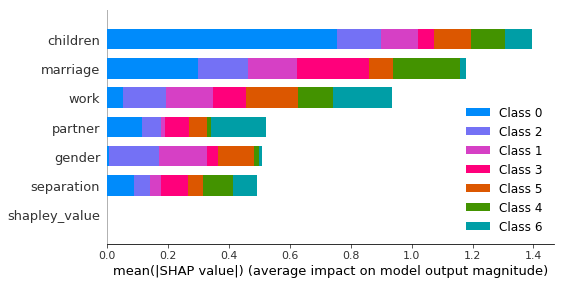

In [75]:
shap.summary_plot(shap_values, features=observations, feature_names=num_features)

In [78]:
shap.dependence_plot("children", shap_values, X_train)

AttributeError: 'list' object has no attribute 'shape'

In [59]:
from helpers import convert_to_lime_format

ImportError: cannot import name 'convert_to_lime_format' from 'helpers' (/anaconda3/lib/python3.7/site-packages/helpers/__init__.py)

In [56]:
from helpers import convert_to_lime_format
convert_to_lime_format(X_train, categorical_names).head()

ImportError: cannot import name 'convert_to_lime_format' from 'helpers' (/anaconda3/lib/python3.7/site-packages/helpers/__init__.py)

In [82]:
explainer = LimeTabularExplainer(convert_to_lime_format(X_train, categorical_names).values,
                                 mode="classification",
                                 feature_names=X_train.columns.tolist(),
                                 categorical_names=categorical_names,
                                 categorical_features=categorical_names.keys(),
                                 discretize_continuous=True,
                                 random_state=42)

NameError: name 'convert_to_lime_format' is not defined

In [83]:
X_train

,work,separation,partner,marriage,children,gender,shapley_value
1312,0.019146,0.020300,0.020539,0.017848,0.020400,1,0.019146
1960,0.012764,0.022496,0.020539,0.020525,0.022950,1,0.012764
213,0.018082,0.016627,0.020539,0.019633,0.019550,1,0.018082
1330,0.021273,0.019562,0.018705,0.021418,0.022950,1,0.021273
1087,0.018082,0.016627,0.020539,0.024095,0.023800,0,0.018082
1702,0.045738,0.020300,0.020539,0.020438,0.017850,1,0.045738
51,0.028719,0.022496,0.020539,0.022310,0.021250,1,0.028719
1892,0.020415,0.020300,0.020539,0.020438,0.020465,1,0.020415
839,0.018082,0.015649,0.019596,0.019633,0.019550,0,0.018082
2199,0.018082,0.026408,0.020539,0.037481,0.020465,0,0.018082


In [2]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

In [3]:
explainer = shap.TreeExplainer(xgb_model.named_steps["model"])

NameError: name 'xgb_model' is not defined

In [87]:
observations = xgb_model.named_steps["preprocessor"].transform(X_train.sample(1000, random_state=42))
shap_values = explainer.shap_values(observations)

In [97]:
i = 0
shap.force_plot([explainer.expected_value, shap_values=shap_values[i], observations[i],num_features],)

SyntaxError: invalid syntax (<ipython-input-97-0fdc38aba545>, line 2)

In [89]:
shap.force_plot?

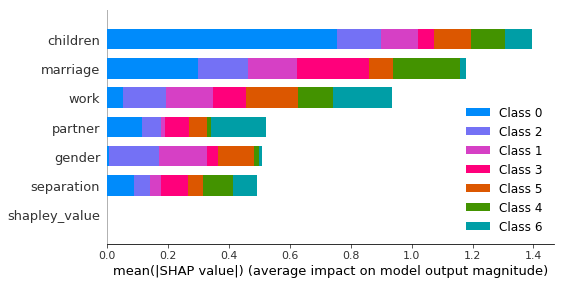

In [79]:
shap.summary_plot(shap_values,X_train , plot_type="bar")

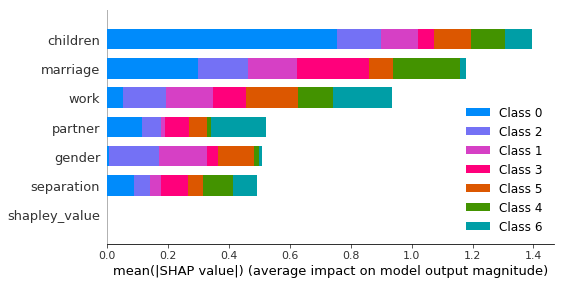

In [80]:
shap.summary_plot(shap_values, X_train)

In [81]:
shap.dependence_plot("work", shap_values, X_train)

AttributeError: 'list' object has no attribute 'shape'

In [87]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

AssertionError: The shap_values arg looks looks multi output, try shap_values[i].

In [88]:
shap.dependence_plot?
y_train

1312    2
1960    1
213     4
1330    5
1087    2
1702    5
51      6
1892    0
839     4
2199    3
1301    0
2169    4
1715    5
1439    5
909     3
607     0
1651    3
1180    2
1820    3
48      0
612     5
1979    2
1275    5
1519    0
1764    1
63      2
1006    0
1395    3
1769    3
1059    4
       ..
1718    5
1017    5
602     4
618     0
873     2
152     2
2124    4
910     4
2227    0
1195    0
649     2
646     1
1548    2
842     6
537     4
1833    6
73      5
1021    3
1956    2
1083    6
1376    0
1247    6
610     0
1891    6
932     4
529     4
1136    6
766     4
1804    2
1857    4
Name: Genaration, Length: 1868, dtype: int64

In [89]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model

model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [90]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

IndexError: index 1868 is out of bounds for axis 0 with size 1868

In [91]:
shap.dependence_plot("work", shap_values, X_train)

AssertionError: 'shap_values' and 'features' values must have the same number of rows!

IndexError: index 1982 is out of bounds for axis 1 with size 1868

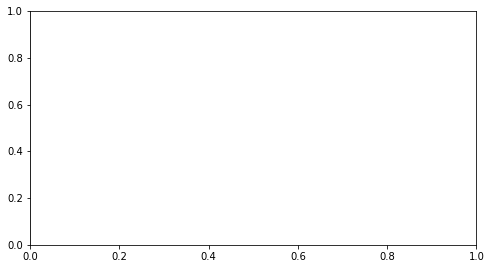

In [92]:
shap.summary_plot(shap_values, X_train)

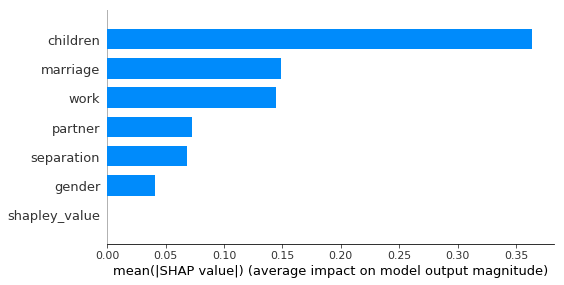

In [93]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [95]:
X_test

,work,separation,partner,marriage,children,gender,shapley_value
1946,0.020210,0.022496,0.020539,0.020525,0.021250,1,0.020210
1999,0.027655,0.020300,0.020539,0.020438,0.020465,0,0.027655
1619,0.020415,0.020300,0.020539,0.020438,0.020465,1,0.020415
1318,0.020415,0.024452,0.020539,0.020525,0.020400,0,0.020415
1640,0.018082,0.017606,0.016033,0.017848,0.019550,1,0.018082
753,0.020415,0.019562,0.020539,0.017848,0.017850,0,0.020415
2296,0.019146,0.021518,0.019596,0.029449,0.019550,1,0.019146
186,0.018082,0.014671,0.013361,0.020438,0.020465,1,0.018082
557,0.020210,0.020300,0.020539,0.020438,0.020465,0,0.020210
1524,0.017019,0.018584,0.020539,0.020438,0.020465,0,0.017019


In [99]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test[1:7])

# plot the feature attributions
shap.image_plot(shap_values, -X_test[1:7])

KeyError: '[1838  445  359 1382  299 1282 1113 1843 1045 1333  997  325  240 1150\n  585 1662  352 1486  925 1453  889 1412  163  758 1502  892  855 1478\n 1803  848 1368 1409 1487   54 1229  609 1813 1682 1678  619 1523 1558\n  436  512   22  316 1036 1266 1746 1154  799  448 1556  302  918  385\n 1349 1653  606 1345 1821  371   65  351  590  726  905 1773  207  922\n 1506   57  313 1220  504 1429  975   95 1692  462   29  808 1095  583\n 1624 1709   41  767  883  713 1299  357 1769 1336 1637  665 1205 1290\n 1670  472] not in index'

In [102]:
import sklearn
import shap
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

# train a SVM classifier
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
Using 1868 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
  0%|          | 0/468 [00:00<?, ?it/s]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  0%|          | 1/468 [00:09<1:13:50,  9.49s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next v

  4%|▍         | 21/468 [03:23<1:09:02,  9.27s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  5%|▍         | 22/468 [03:33<1:10:14,  9.45s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  5%|▍         | 23/468 [03:42<1:09:56,  9.43s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use o

  9%|▉         | 43/468 [06:53<1:07:47,  9.57s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  9%|▉         | 44/468 [07:03<1:08:15,  9.66s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 10%|▉         | 45/468 [07:12<1:07:32,  9.58s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use o

 14%|█▍        | 65/468 [10:29<1:06:51,  9.95s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 14%|█▍        | 66/468 [10:38<1:05:09,  9.73s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 14%|█▍        | 67/468 [10:48<1:04:02,  9.58s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use o

 19%|█▊        | 87/468 [14:02<1:07:30, 10.63s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 19%|█▉        | 88/468 [14:12<1:06:49, 10.55s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 19%|█▉        | 89/468 [14:21<1:04:11, 10.16s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use o

 23%|██▎       | 109/468 [17:30<55:12,  9.23s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 24%|██▎       | 110/468 [17:39<54:48,  9.18s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 24%|██▎       | 111/468 [17:49<56:50,  9.55s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 28%|██▊       | 131/468 [21:03<53:22,  9.50s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 28%|██▊       | 132/468 [21:12<52:36,  9.39s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 28%|██▊       | 133/468 [21:21<52:04,  9.33s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 33%|███▎      | 153/468 [24:25<49:04,  9.35s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 33%|███▎      | 154/468 [24:34<48:33,  9.28s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 33%|███▎      | 155/468 [24:43<48:05,  9.22s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 37%|███▋      | 175/468 [27:55<45:26,  9.31s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 38%|███▊      | 176/468 [28:04<45:02,  9.25s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 38%|███▊      | 177/468 [28:13<44:43,  9.22s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 42%|████▏     | 197/468 [31:23<42:25,  9.39s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 42%|████▏     | 198/468 [31:32<41:54,  9.31s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 43%|████▎     | 199/468 [31:41<41:34,  9.27s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 47%|████▋     | 219/468 [34:49<37:30,  9.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 47%|████▋     | 220/468 [34:58<37:17,  9.02s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 47%|████▋     | 221/468 [35:07<37:09,  9.03s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 51%|█████▏    | 241/468 [38:09<34:31,  9.12s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 52%|█████▏    | 242/468 [38:18<34:17,  9.10s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 52%|█████▏    | 243/468 [38:27<34:03,  9.08s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 56%|█████▌    | 263/468 [41:28<30:58,  9.07s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 56%|█████▋    | 264/468 [41:37<30:50,  9.07s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 57%|█████▋    | 265/468 [41:47<30:39,  9.06s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 61%|██████    | 285/468 [44:48<27:35,  9.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 61%|██████    | 286/468 [44:57<27:24,  9.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 61%|██████▏   | 287/468 [45:06<27:17,  9.05s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 66%|██████▌   | 307/468 [48:09<24:17,  9.06s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 66%|██████▌   | 308/468 [48:18<24:08,  9.05s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 66%|██████▌   | 309/468 [48:28<23:58,  9.05s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 70%|███████   | 329/468 [51:28<20:56,  9.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 71%|███████   | 330/468 [51:37<20:46,  9.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 71%|███████   | 331/468 [51:46<20:38,  9.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 75%|███████▌  | 351/468 [54:48<18:03,  9.26s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 75%|███████▌  | 352/468 [54:57<18:05,  9.36s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 75%|███████▌  | 353/468 [55:07<17:48,  9.29s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 80%|███████▉  | 373/468 [58:08<14:19,  9.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 80%|███████▉  | 374/468 [58:17<14:10,  9.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 80%|████████  | 375/468 [58:26<14:01,  9.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of A

 84%|████████▍ | 395/468 [1:01:28<11:00,  9.05s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 85%|████████▍ | 396/468 [1:01:37<10:51,  9.05s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 85%|████████▍ | 397/468 [1:01:47<10:42,  9.05s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

 89%|████████▉ | 417/468 [1:04:51<07:41,  9.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 89%|████████▉ | 418/468 [1:05:00<07:32,  9.05s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 90%|████████▉ | 419/468 [1:05:09<07:23,  9.05s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

 94%|█████████▍| 439/468 [1:08:10<04:22,  9.05s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 94%|█████████▍| 440/468 [1:08:19<04:13,  9.05s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 94%|█████████▍| 441/468 [1:08:28<04:04,  9.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

 99%|█████████▊| 461/468 [1:11:29<01:03,  9.03s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 99%|█████████▊| 462/468 [1:11:38<00:54,  9.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 99%|█████████▉| 463/468 [1:11:47<00:45,  9.04s/it]/anaconda3/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

In [103]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")

In [104]:
shap.TreeExplainer(model).shap_interaction_values(X_train)

array([[[ 3.36069018e-02, -6.05234504e-03, -3.16614285e-03, ...,
         -4.94144261e-02,  5.02979383e-04,  0.00000000e+00],
        [-6.05234131e-03, -2.57984344e-02, -6.38573430e-03, ...,
         -4.17729020e-02,  2.60563567e-04,  0.00000000e+00],
        [-3.16610746e-03, -6.38571754e-03, -3.69681008e-02, ...,
         -2.27068663e-02, -2.56973971e-03,  0.00000000e+00],
        ...,
        [-4.94151153e-02, -4.17723060e-02, -2.27078479e-02, ...,
         -8.21199954e-01, -1.15983002e-02,  0.00000000e+00],
        [ 5.02988696e-04,  2.60569155e-04, -2.56978348e-03, ...,
         -1.15982294e-02,  4.47272509e-02,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 3.78705524e-02,  1.90086127e-03, -3.42836790e-03, ...,
          7.46978074e-03, -9.02028754e-03,  0.00000000e+00],
        [ 1.90087408e-03, -1.01589914e-02,  6.23986125e-06, ...,
          7.45143741e-03,  1.63031369e